In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np # 
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Parse the data into a structured format
data=pd.read_csv("ct5129_dyslexia\\data\\Dyt-desktop.csv")
# Splitting the single column into multiple columns based on the delimiter';'
parsed_data = data.iloc[:, 0].str.split(';', expand=True)

# Step 2: Assign meaningful column names
columns = [
    "Gender", "NativeLang", "OtherLang", "Age",
    *(f"Clicks{i};Hits{i};Misses{i};Score{i};Accuracy{i};Missrate{i}".split(";") for i in range(1, 33)),
    "Dyslexia"
]
parsed_data.columns = [col for sublist in columns for col in (sublist if isinstance(sublist, list) else [sublist])]

# Step 3: Convert relevant columns to numerical and encode categorical features
# Example: Encoding Gender and NativeLang
parsed_data['Gender'] = LabelEncoder().fit_transform(parsed_data['Gender'])
parsed_data['NativeLang'] = LabelEncoder().fit_transform(parsed_data['NativeLang'])
parsed_data['OtherLang'] = LabelEncoder().fit_transform(parsed_data['OtherLang'])

# Convert numeric columns
for col in parsed_data.columns[3:]:  # Skipping first 3 non-numeric columns
    parsed_data[col] = pd.to_numeric(parsed_data[col], errors='coerce')

# Step 4: Handle missing values (if any)
parsed_data.fillna(parsed_data.mean(), inplace=True)

# Step 5: Select features and target
features = parsed_data.drop(columns=["Dyslexia"])
target = parsed_data["Dyslexia"]
target = LabelEncoder().fit_transform(target)  # Encode the target

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

# Step 7: Train a kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 8: Make predictions and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1458\n\n    accuracy                           1.00      1458\n   macro avg       1.00      1.00      1.00      1458\nweighted avg       1.00      1.00      1.00      1458\n')

Accuracy of Decision Tree Classifier: 0.85


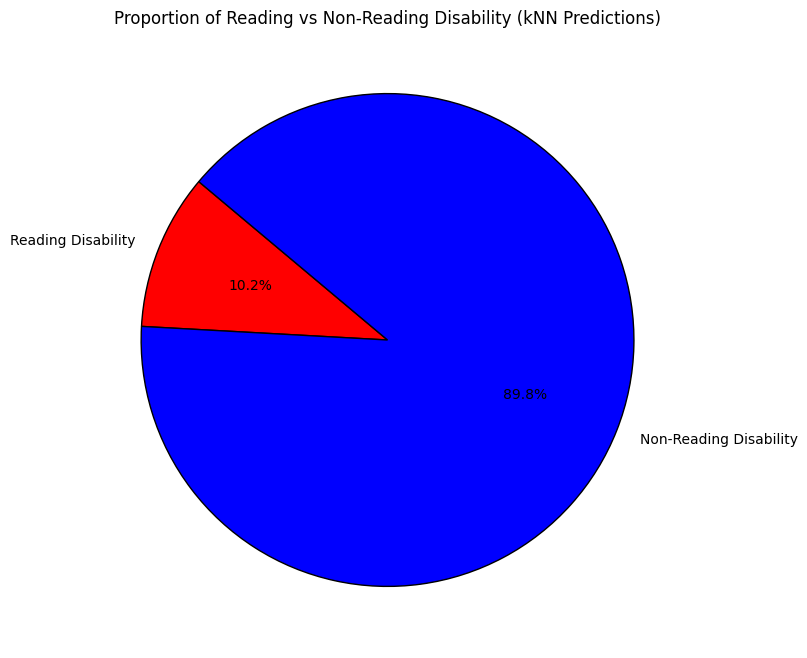

In [20]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
data = pd.read_csv('ct5129_dyslexia/data/Dyt-desktop.csv', engine='python')

# Step 2: Parse the dataset into structured columns
# Check and confirm the delimiter
parsed_data = data.iloc[:, 0].str.split(';', expand=True)

# Step 3: Assign column names dynamically
columns = ["Gender", "NativeLang", "OtherLang", "Age"]
for i in range(1, 33):
    columns.extend([f"Clicks{i}", f"Hits{i}", f"Misses{i}", f"Score{i}", f"Accuracy{i}", f"Missrate{i}"])
columns.append("Dyslexia")

# Validate the number of columns
if len(columns) != parsed_data.shape[1]:
    print(f"Warning: Column mismatch! Generated {len(columns)} names, but the dataset has {parsed_data.shape[1]} columns.")
    print("Adjusting column assignment to fit the dataset structure.")
    columns = columns[:parsed_data.shape[1]]

parsed_data.columns = columns

# Step 4: Encode categorical columns
encoder = LabelEncoder()
parsed_data["Gender"] = encoder.fit_transform(parsed_data["Gender"])
parsed_data["NativeLang"] = encoder.fit_transform(parsed_data["NativeLang"])
parsed_data["OtherLang"] = encoder.fit_transform(parsed_data["OtherLang"])
parsed_data["Dyslexia"] = encoder.fit_transform(parsed_data["Dyslexia"])

# Step 5: Convert numerical columns
for col in parsed_data.columns[3:]:
    parsed_data[col] = pd.to_numeric(parsed_data[col], errors='coerce')

# Handle missing values
parsed_data.fillna(parsed_data.mean(), inplace=True)

# Step 6: Define features and target
features = parsed_data.drop(columns=["Dyslexia"])
target = parsed_data["Dyslexia"]

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.7, random_state=42)

# Step 8: Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = decision_tree.predict(X_test)

# Step 10: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy:.2f}")

# Step 11: Separate predictions for visualization
read_disability_data = X_test[y_pred == 1]
non_read_disability_data = X_test[y_pred == 0]
X_test = X_test.copy()  # Avoid fragmentation
X_test["Prediction"] = y_pred  # Add predictions as a new column

# Step 10: Calculate proportions for pie chart
reading_disability_count = (X_test["Prediction"] == 1).sum()
non_reading_disability_count = (X_test["Prediction"] == 0).sum()

# Labels and data for pie chart
labels = ["Reading Disability", "Non-Reading Disability"]
sizes = [reading_disability_count, non_reading_disability_count]
colors = ["red", "blue"]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

# Add title
plt.title("Proportion of Reading vs Non-Reading Disability (kNN Predictions)")
plt.show()


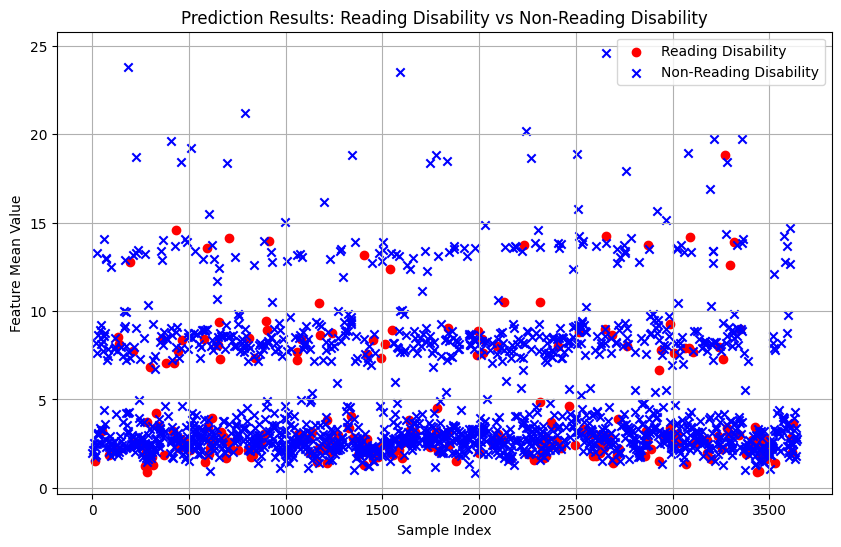

In [7]:
# Step 11: Separate predictions for visualization
read_disability_data = X_test[y_pred == 1]
non_read_disability_data = X_test[y_pred == 0]

plt.figure(figsize=(10, 6))

# Scatter points for reading disability
plt.scatter(
    read_disability_data.index, 
    read_disability_data.mean(axis=1), 
    label="Reading Disability", 
    color='red', 
    marker='o'
)

# Scatter points for non-reading disability
plt.scatter(
    non_read_disability_data.index, 
    non_read_disability_data.mean(axis=1), 
    label="Non-Reading Disability", 
    color='blue', 
    marker='x'
)

plt.title("Prediction Results: Reading Disability vs Non-Reading Disability")
plt.xlabel("Sample Index")
plt.ylabel("Feature Mean Value")
plt.legend()
plt.grid(True)
plt.show()